Revenue Prediction
==================
In this project the goal is to predict movies revenue using their features. revenue is given by ( box_office - budget ) so the main goal is to predict box office. 

1. Prepare and preprocess the given data. 

2. After exploring data find, select and especially create new features. ignore others.

3. Prepare features to feed the model. 

4. Select and try different models.

5. Document and report each step using relative plots and a brief explanation. finally report the best suited model and justify why did it performed well.



- Keep in mind that in this task accuracy itself only has only part of score.

- Hint: to create new features you can use credit attributes. Think of it this way, what affects box office?  

**Tools** 

importing useful tools and libraries. you may use any other library as well.

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Modelling
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [56]:
np.random.seed(101)

In [57]:
# Your project struct must look like this,


# |── Name_SID.zip
# │   ├── data
# │   │       ├── rotten_tomatoes_5000_movies.csv
# │   │       ├── rotten_tomatoes_5000_movies.csv
# │   ├── *.ipynb
# │   ├── document.pdf

df_movies = pd.read_csv(r"data/rotten_tomatoes_5000_movies.csv")
df_credit = pd.read_csv(r"data/rotten_tomatoes_5000_credits.csv")


In [58]:
df_movies = df_movies[df_movies['rt_box_office']!=0]
y = df_movies['rt_box_office']
X = df_movies.drop(columns='rt_box_office')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

In [59]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3376 entries, 0 to 4798
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rt_production_budget     3376 non-null   int64  
 1   rt_genres                3376 non-null   object 
 2   rt_website               1396 non-null   object 
 3   rt_movie_id              3376 non-null   int64  
 4   rt_keywords              3376 non-null   object 
 5   rt_original_language     3376 non-null   object 
 6   rt_original_title        3376 non-null   object 
 7   rt_synopsis              3376 non-null   object 
 8   rt_audience_score        3376 non-null   float64
 9   rt_studios               3376 non-null   object 
 10  rt_production_countries  3376 non-null   object 
 11  rt_release_date          3376 non-null   object 
 12  rt_box_office            3376 non-null   int64  
 13  rt_runtime               3376 non-null   float64
 14  rt_languages            

In [60]:
df_credit.head()

,rt_movie_id,rt_title,rt_actors,rt_staff
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [61]:
df_movies.describe()

,rt_production_budget,rt_movie_id,rt_audience_score,rt_box_office,rt_runtime,rt_critics_score,rt_review_count
count,3.376000e+03,3376.000000,3376.000000,3.376000e+03,3376.000000,3376.000000,3376.000000
mean,3.888424e+07,45518.799171,28.260492,1.170314e+08,110.382109,6.308738,944.422690
std,4.420490e+07,74725.406344,35.622362,1.834831e+08,21.116082,0.882279,1392.846418
min,0.000000e+00,5.000000,0.019984,5.000000e+00,0.000000,0.000000,0.000000
25%,8.500000e+06,5538.250000,9.957286,1.535290e+07,96.000000,5.800000,160.750000
50%,2.500000e+07,11581.500000,19.755221,5.175184e+07,106.000000,6.300000,440.500000
75%,5.200000e+07,47370.750000,36.425937,1.401651e+08,121.000000,6.900000,1091.250000
max,3.800000e+08,417859.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


## Preprocessing & Data cleaning

In [62]:
df_movies.isnull().sum()

rt_production_budget          0
rt_genres                     0
rt_website                 1980
rt_movie_id                   0
rt_keywords                   0
rt_original_language          0
rt_original_title             0
rt_synopsis                   0
rt_audience_score             0
rt_studios                    0
rt_production_countries       0
rt_release_date               0
rt_box_office                 0
rt_runtime                    0
rt_languages                  0
rt_release_status             0
rt_tagline                  282
rt_title                      0
rt_critics_score              0
rt_review_count               0
dtype: int64

In [63]:
import json
# Handle missing values in df_movies
df_movies.fillna({"rt_website": "Unknown", "rt_tagline": "Unknown"}, inplace=True)

# Convert release date to datetime
df_movies["rt_release_date"] = pd.to_datetime(df_movies["rt_release_date"], errors='coerce')

#Data Analysis

# Parse JSON-like columns in movies and credits datasets
def parse_json_column(column):
    def safe_json_parse(entry):
        if isinstance(entry, str):
            try:
                return json.loads(entry.replace("'", '"'))
            except json.JSONDecodeError:
                return []
        return []
    return column.apply(safe_json_parse)

df_movies["rt_genres"] = parse_json_column(df_movies["rt_genres"])
df_movies["rt_keywords"] = parse_json_column(df_movies["rt_keywords"])
df_movies["rt_languages"] = parse_json_column(df_movies["rt_languages"])
df_movies["rt_production_countries"] = parse_json_column(df_movies["rt_production_countries"])

df_credit["rt_actors"] = parse_json_column(df_credit["rt_actors"])
df_credit["rt_staff"] = parse_json_column(df_credit["rt_staff"])

data = pd.merge(df_movies, df_credit, on=["rt_movie_id", "rt_title"], how="inner")


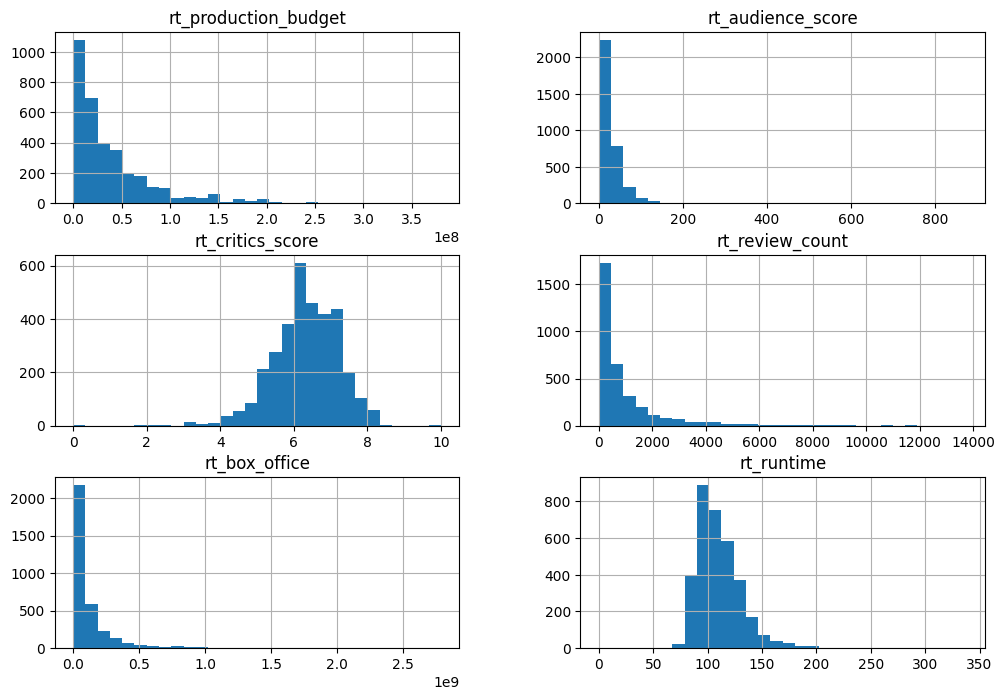

In [64]:
# Select numerical columns
num_cols = ['rt_production_budget', 'rt_audience_score', 'rt_critics_score', 'rt_review_count', 'rt_box_office', 'rt_runtime']

# Plot histograms
df_movies[num_cols].hist(figsize=(12, 8), bins=30)
plt.show()

Check correlations between features and rt_box_office:


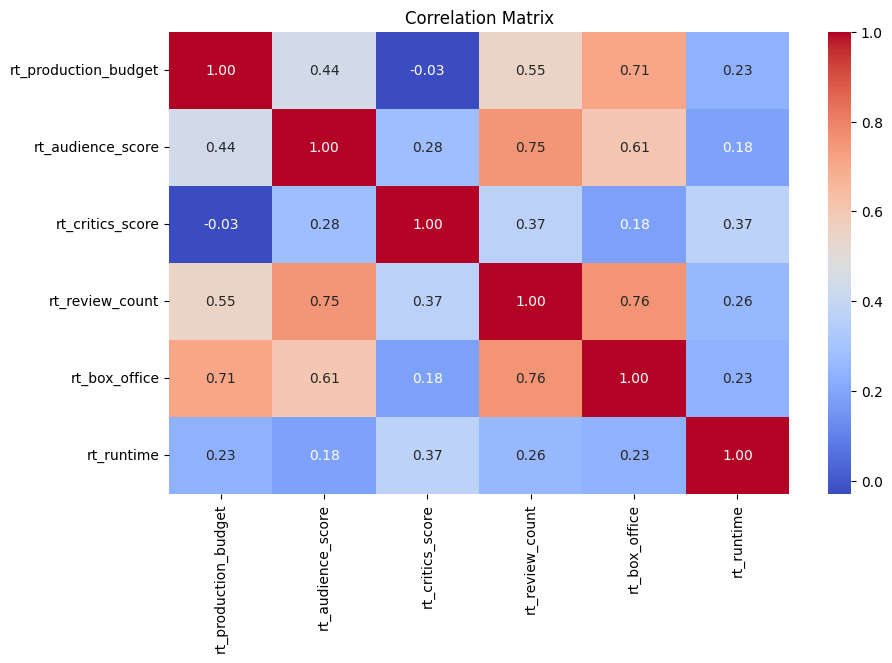

In [65]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_movies[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

rt_review_count (0.76) and rt_production_budget (0.71) are the strongest predictors. It means higher budget and more audience engagement (reviews) tend to increase revenue.
Also rt_audience_score (0.61) matters more than rt_critics_score (0.18) which means What general audiences think is more influential than critics' reviews.

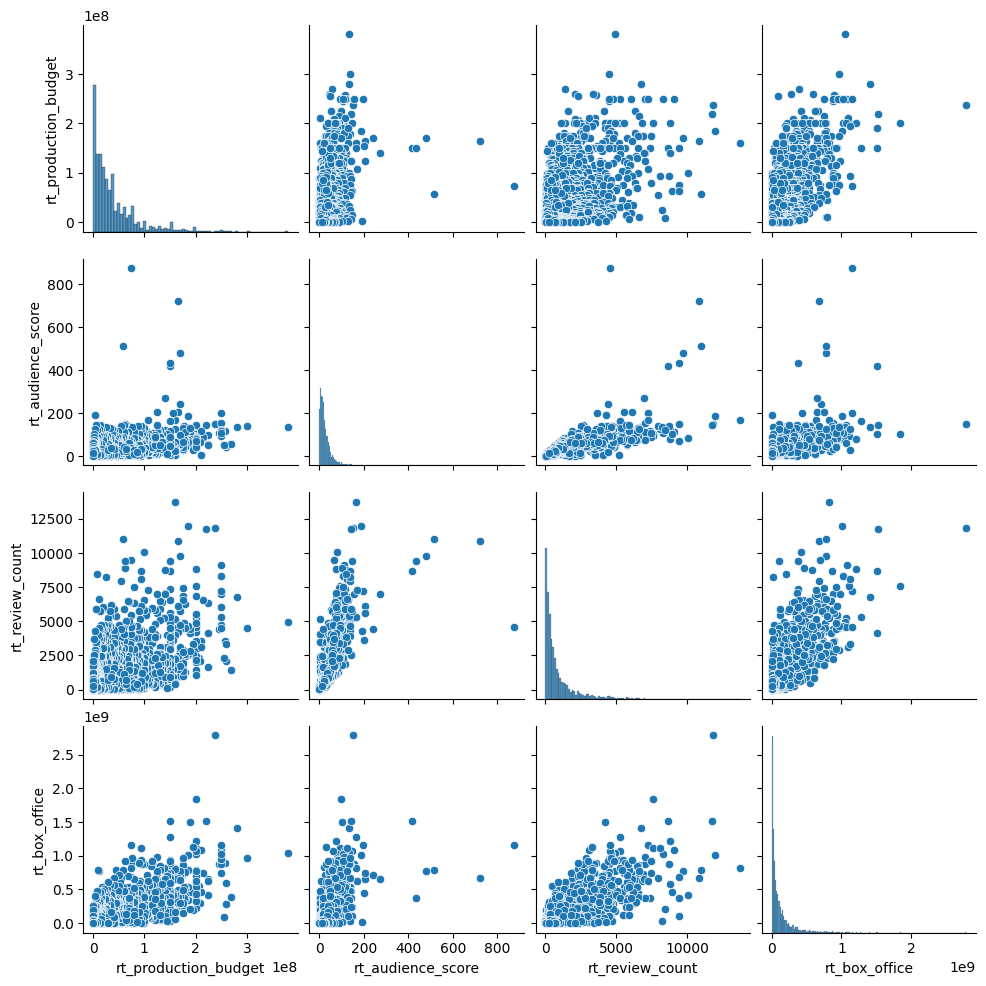

In [66]:
sns.pairplot(df_movies[['rt_production_budget', 'rt_audience_score', 'rt_review_count', 'rt_box_office']])
plt.show()

As you can see I plot pairwise relationships between the top correlated features, such as rt_production_budget, rt_audience_score, and rt_review_count, to better understand how they relate to the target variable.

### Production Budget Distribution Across Genres

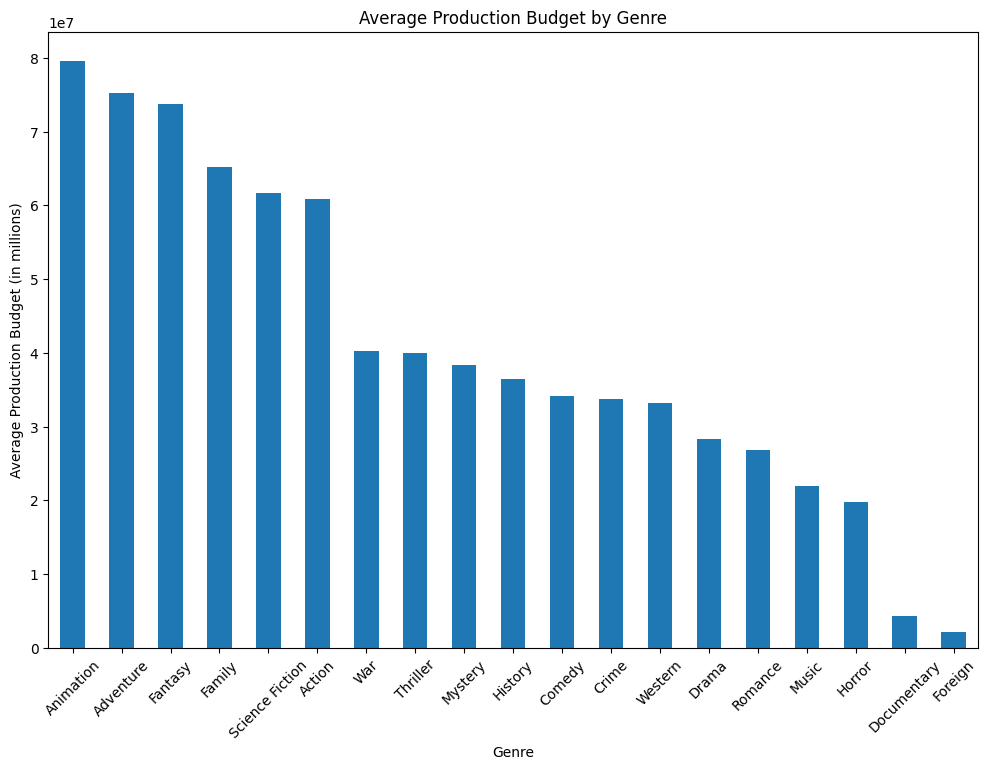

In [67]:
# Extract genre names from the 'rt_genres' column
def extract_genre_names(genre_data):
    try:
        return [genre['name'] for genre in genre_data]  # Assuming genre_data is already a list of dicts
    except:
        return []

# Apply the extraction function to the 'rt_genres' column to create a new 'genres' column
df_movies['genres'] = df_movies['rt_genres'].apply(lambda x: extract_genre_names(x))

# Explode the 'genres' list so each movie can have a separate row for each genre
df_exploded = df_movies.explode('genres')

# Group by 'genres' and calculate the average production budget
avg_budget_genre = df_exploded.groupby('genres')['rt_production_budget'].mean().sort_values(ascending=False)

# Plot the average production budget by genre
plt.figure(figsize=(12, 8))
avg_budget_genre.plot(kind='bar')
plt.title('Average Production Budget by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Production Budget (in millions)')
plt.xticks(rotation=45)
plt.show()

By this code we can answer the first question of EDA.

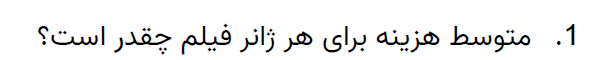

We need to group the data by genre and calculate the mean of rt_production_budget. So as we can see the most production budget is spend for Animation. Adventure is the second and so on.

In [68]:
top_5_average_expensive_genres = avg_budget_genre.head(5)
top_5_average_expensive_genres

genres
Animation          7.955718e+07
Adventure          7.529758e+07
Fantasy            7.370141e+07
Family             6.520481e+07
Science Fiction    6.166937e+07
Name: rt_production_budget, dtype: float64

As we can see these are the top 5 most expensive genres by **average production budget**

### Countries VS Genres

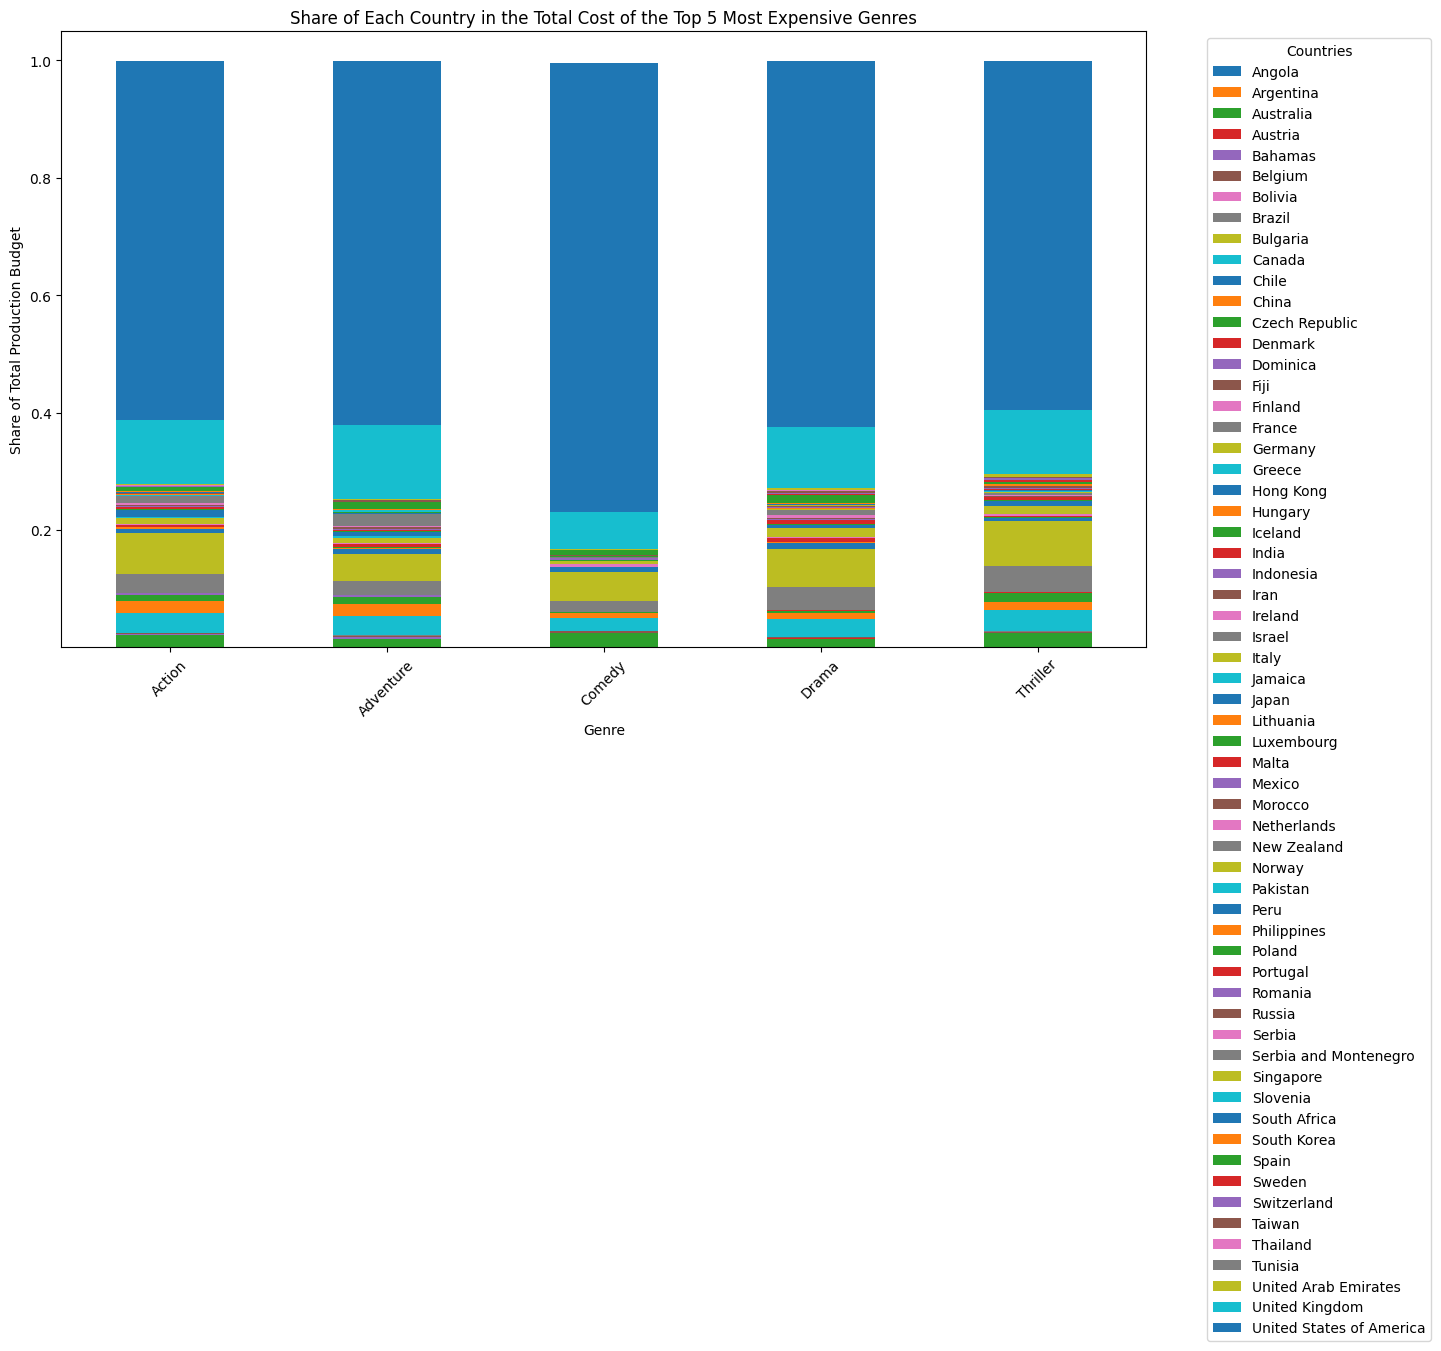

In [69]:
def extract_country_names(country_data):
    try:
        return [country['name'] for country in country_data]
    except:
        return []

df_movies['countries'] = df_movies['rt_production_countries'].apply(lambda x: extract_country_names(x))

df_exploded = df_movies.explode('genres')
df_exploded_countries = df_exploded.explode('countries')

total_budget_by_genre = df_exploded_countries.groupby('genres')['rt_production_budget'].sum().sort_values(ascending=False)

top_5_expensive_genres = total_budget_by_genre.head(5)

df_top_5_genres = df_exploded_countries[df_exploded_countries['genres'].isin(top_5_expensive_genres.index)].copy()  # Create a copy

df_top_5_genres['total_production_budget'] = df_top_5_genres.groupby('genres')['rt_production_budget'].transform('sum')
df_top_5_genres['country_share'] = df_top_5_genres['rt_production_budget'] / df_top_5_genres['total_production_budget']

country_share_by_genre = df_top_5_genres.groupby(['genres', 'countries'])['country_share'].sum().unstack().fillna(0)

# Plot the share of each country in the total cost of the top 5 most expensive genres
country_share_by_genre.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Share of Each Country in the Total Cost of the Top 5 Most Expensive Genres')
plt.xlabel('Genre')
plt.ylabel('Share of Total Production Budget')
plt.xticks(rotation=45)
plt.legend(title="Countries", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

As we can see there are many countries and analyzing the data is not possible. So i'll limit the analysis to the top 10 countries that produce the most movies so it will make the results more manageable and focus on the most relevant data. Here’s how to modify the code to select the top 10 countries by the number of movies:

1. First, we need to count how many movies each country is associated with.
2. Then, we select the top 10 countries that have the highest number of movies.
3. Finally, we proceed with the analysis for only those top 10 countries.

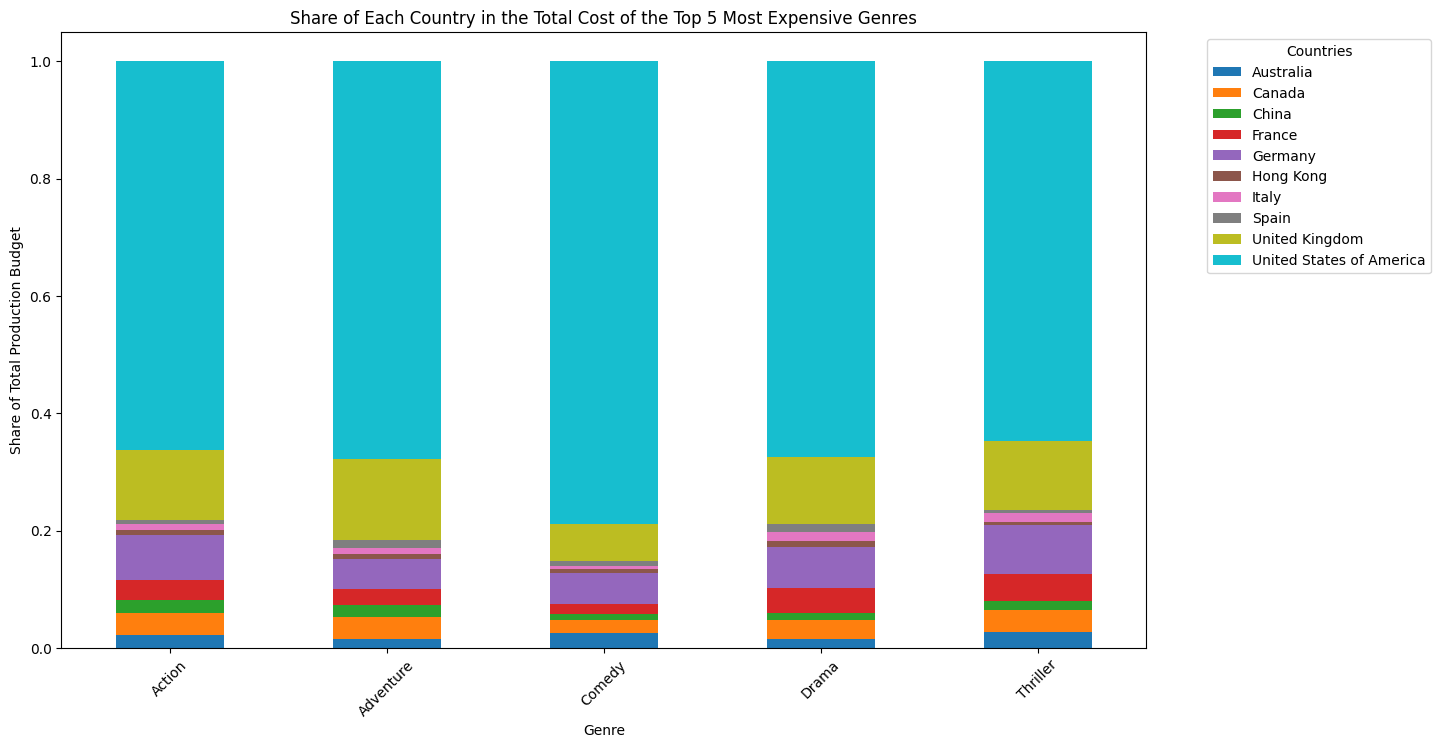

In [70]:
top_5_expensive_genres = total_budget_by_genre.head(5).index
df_top_5_genres_countries = df_exploded_countries[df_exploded_countries['genres'].isin(top_5_expensive_genres)]
country_movie_count = df_top_5_genres_countries['countries'].value_counts()
top_10_countries = country_movie_count.head(10).index
df_top_10_countries = df_top_5_genres_countries[df_top_5_genres_countries['countries'].isin(top_10_countries)].copy()  # Create a copy

df_top_10_countries['total_production_budget'] = df_top_10_countries.groupby('genres')['rt_production_budget'].transform('sum')
df_top_10_countries['country_share'] = df_top_10_countries['rt_production_budget'] / df_top_10_countries['total_production_budget']

country_share_by_genre = df_top_10_countries.groupby(['genres', 'countries'])['country_share'].sum().unstack().fillna(0)

country_share_by_genre.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Share of Each Country in the Total Cost of the Top 5 Most Expensive Genres')
plt.xlabel('Genre')
plt.ylabel('Share of Total Production Budget')
plt.xticks(rotation=45)
plt.legend(title="Countries", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Note:  As we can see the top 5 most expensive genres here are different!** <br>
Here's what's happening:

Average Budget by Genre: In the first part of your analysis, when you calculated the average production budget by genre, each movie was weighted equally, and you found that the Animation genre had the highest average budget.

Total Budget by Genre: In the second part, when calculating the total production budget for each genre, we are summing up the production budgets for all movies in each genre. Genres like Action and Adventure could have a lot more movies overall, which increases their total production budget despite the average budget being lower for those genres.

In [71]:
df_top_10_countries = df_top_10_countries.copy()
df_top_10_countries['country_share_value'] = df_top_10_countries['rt_production_budget']
country_share_by_genre_value = df_top_10_countries.groupby(['genres', 'countries'])['country_share_value'].sum().unstack().fillna(0)
country_share_by_genre_value


countries,Australia,Canada,China,France,Germany,Hong Kong,Italy,Spain,United Kingdom,United States of America
genres,,,,,,,,,,
Action,1854922476,3075200028,1831691000,2932100000,6316030000,686566953,930000000,591000000,9843692258,55275590745
Adventure,1151855523,2615000000,1516831000,1949250400,3674250430,646490000,702250400,961250400,9956050000,48911732120
Comedy,1241866953,1112091926,435000000,886567054,2520197241,371216953,223650400,382150267,3129219596,38324909730
Drama,957000000,1909800000,692335005,2535769584,4205889909,649860000,946745750,833693517,6780237355,40501993747
Thriller,1508400000,2200250028,850000000,2675787650,4765430000,305500000,862700000,282187650,6712053808,36914271616


In [72]:
df_top_10_countries = df_top_10_countries.copy()
df_top_10_countries.loc[:, 'country_share_percentage'] = (df_top_10_countries['country_share_value'] / df_top_10_countries['total_production_budget']) * 100
country_share_by_genre_percentage = df_top_10_countries.groupby(['genres', 'countries'])['country_share_percentage'].sum().unstack().fillna(0)

country_share_transposed = country_share_by_genre_percentage.transpose().round(2)
country_share_transposed


genres,Action,Adventure,Comedy,Drama,Thriller
countries,,,,,
Australia,2.23,1.60,2.55,1.59,2.64
Canada,3.69,3.63,2.29,3.18,3.85
China,2.20,2.10,0.89,1.15,1.49
France,3.52,2.70,1.82,4.23,4.69
Germany,7.58,5.10,5.18,7.01,8.35
Hong Kong,0.82,0.90,0.76,1.08,0.54
Italy,1.12,0.97,0.46,1.58,1.51
Spain,0.71,1.33,0.79,1.39,0.49
United Kingdom,11.81,13.81,6.44,11.30,11.76


By this code and the plots, we can answer the 2nd question of EDA.

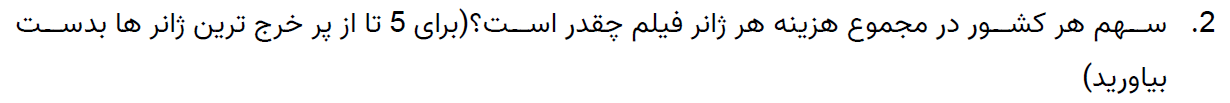

As we expected the United States of America has more share than other countries and United Kingdom is in the second place.

### Genres VS Released Dates

In [73]:
df_movies['rt_release_date'] = pd.to_datetime(df_movies['rt_release_date'], format='%Y/%m/%d')

# Filter movies released in the last 10 years
current_year = pd.to_datetime('today').year
last_10_years = df_movies[df_movies['rt_release_date'].dt.year >= (current_year - 10)]
top_3_expensive_genres = avg_budget_genre.head(3).index
df_last_10_years_top_3_genres = df_movies[df_movies['genres'].apply(lambda x: any(genre in top_3_expensive_genres for genre in x))]

genre_count_last_10_years = df_last_10_years_top_3_genres['genres'].explode().value_counts()

print(f"Number of films made in the most expensive genres in the last 10 years:\n")
print(genre_count_last_10_years)

Number of films made in the most expensive genres in the last 10 years:

Adventure          675
Action             462
Fantasy            351
Comedy             307
Family             292
Science Fiction    230
Thriller           221
Drama              207
Animation          191
Romance             88
Crime               53
Horror              51
Mystery             45
War                 30
History             23
Western             19
Music               17
Documentary          1
Foreign              1
Name: genres, dtype: int64


By this code we can answer the 3rd question.

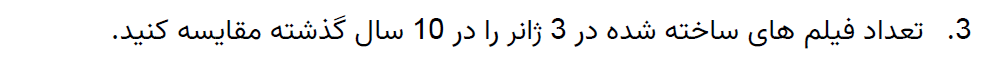

As we can see the Adventure genre is the most produced genre in the last 10 years and Action is in the second place.

### Countries VS Runtime

In [74]:
df_movies['production_countries_list'] = df_movies['rt_production_countries'].apply(lambda x: [country['name'] for country in x])

country_runtime = df_movies.explode('production_countries_list').groupby('production_countries_list')['rt_runtime'].mean().round(2)

longest_10 = country_runtime.sort_values(ascending=False).head(10)
shortest_10 = country_runtime.sort_values(ascending=True).head(10)

print("Top 10 countries with the longest average runtime:")
print(longest_10)

print("\nTop 10 countries with the shortest average runtime:")
print(shortest_10)

Top 10 countries with the longest average runtime:
production_countries_list
Singapore      172.00
Dominica       151.00
Slovenia       150.00
Malta          143.00
Morocco        141.33
Portugal       133.00
Jamaica        130.50
New Zealand    130.45
Philippines    130.00
Italy          128.67
Name: rt_runtime, dtype: float64

Top 10 countries with the shortest average runtime:
production_countries_list
Monaco      84.00
Angola      85.00
Iran        89.00
Israel      90.00
Fiji        98.00
Bolivia     98.00
Bulgaria    98.33
Thailand    98.67
Greece      99.00
Peru        99.50
Name: rt_runtime, dtype: float64


By this code we can answer the 4th question.

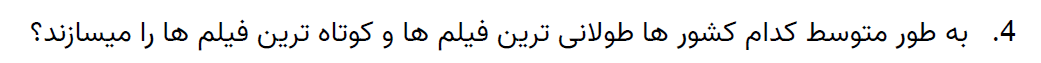

The above list contains countries with longest average runtime and the below list contains countries with shortest average runtime. 

## Most Frequent Language

In [75]:
df_movies['languages_list'] = df_movies['rt_languages'].apply(lambda x: [language['name'] for language in x] if isinstance(x, list) else [])

df_movies = df_movies[df_movies['languages_list'].apply(len) > 0]

df_exploded_languages = df_movies.explode('languages_list')
language_count = df_exploded_languages['languages_list'].value_counts()
language_count = language_count[language_count.index != 'English']

print("Most frequently used languages (apart from English):")
language_count.head(10)

Most frequently used languages (apart from English):


Français     316
Español      281
Deutsch      184
Pусский      153
Italiano     146
日本語           83
普通话           82
العربية       56
Português     49
Latin         43
Name: languages_list, dtype: int64

By this code we can answer the 5th question.

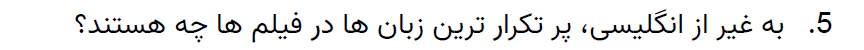

As we can see the most frequently used languages apart from English is France and the second place is Espanish.

### Country VS  Released Year

In [76]:
df_movies['rt_release_date'] = pd.to_datetime(df_movies['rt_release_date'], format='%m/%d/%Y')

df_us_movies = df_movies[df_movies['rt_production_countries'].apply(lambda x: any(country['name'] == "United States of America" for country in x))]

current_year = pd.to_datetime('today').year
last_10_years = df_us_movies[df_us_movies['rt_release_date'].dt.year >= (current_year - 10)].copy()
last_10_years.loc[:, 'release_year'] = last_10_years['rt_release_date'].dt.year

annual_budget_us = last_10_years.groupby('release_year')['rt_production_budget'].sum().apply(lambda x: f"{x:,.0f}$")

print("United States total spending on the film industry:")
print(annual_budget_us)

United States total spending on the film industry:
release_year
2015    6,107,500,003$
2016    4,475,400,000$
Name: rt_production_budget, dtype: object


#### Since the last record of produced movie is 2016, I'll change the 10 years ago from current year to 2006 to 2016.

In [77]:
df_movies['rt_release_date'] = pd.to_datetime(df_movies['rt_release_date'], format='%m/%d/%Y')

df_us_movies = df_movies[df_movies['rt_production_countries'].apply(lambda x: any(country['name'] == "United States of America" for country in x))]

last_10_years = df_us_movies[df_us_movies['rt_release_date'].dt.year >= (2016 - 10)].copy()
last_10_years.loc[:, 'release_year'] = last_10_years['rt_release_date'].dt.year

annual_budget_us = last_10_years.groupby('release_year')['rt_production_budget'].sum().apply(lambda x: f"{x:,.0f}$")

print("United States total spending on the film industry:")
print(annual_budget_us)

United States total spending on the film industry:
release_year
2006    6,065,050,000$
2007    5,250,715,000$
2008    6,341,900,000$
2009    6,758,546,652$
2010    7,052,202,650$
2011    6,926,255,000$
2012    6,871,525,000$
2013    7,522,270,010$
2014    6,855,000,000$
2015    6,107,500,003$
2016    4,475,400,000$
Name: rt_production_budget, dtype: object


By this code we can answer the 6th question.

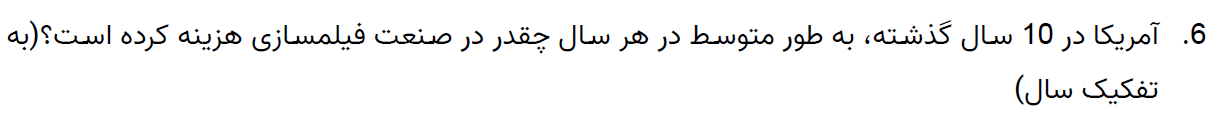

In [78]:
df_movies['rt_release_date'] = pd.to_datetime(df_movies['rt_release_date'], format='%m/%d/%Y')

last_10_years = df_movies[df_movies['rt_release_date'].dt.year >= (2016 - 10)].copy()
last_10_years.loc[:, 'release_year'] = last_10_years['rt_release_date'].dt.year

annual_budget_all = last_10_years.groupby('release_year')['rt_production_budget'].sum().apply(lambda x: f"{x:,.0f}$")

print("Total spending on the film industry each year (all countries):")
print(annual_budget_all)

Total spending on the film industry each year (all countries):
release_year
2006    6,466,729,867$
2007    5,637,827,510$
2008    6,836,899,099$
2009    7,132,277,844$
2010    7,428,370,336$
2011    7,552,445,771$
2012    7,108,572,154$
2013    7,914,389,300$
2014    7,017,500,000$
2015    6,394,500,003$
2016    4,593,390,000$
Name: rt_production_budget, dtype: object


By this code we can answer the 7th question.

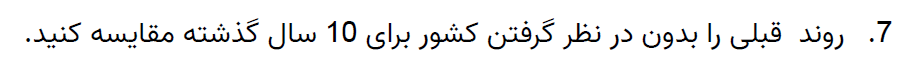

### Johnny Depp

In [79]:
df_credit['actor_names'] = df_credit['rt_actors'].apply(lambda actors: [actor['name'] for actor in actors])

johnny_depp_movies = df_credit[df_credit['actor_names'].apply(lambda x: 'Johnny Depp' in x if isinstance(x, list) else False)]

result = johnny_depp_movies['rt_title']
print("Movies starring Johnny Depp:\n", result)

Movies starring Johnny Depp:
 117     Charlie and the Chocolate Factory
178                                 Rango
333                         Transcendence
499                         Jack and Jill
783                             Mortdecai
1119                       21 Jump Street
1203                        Secret Window
1378            A Nightmare on Elm Street
1581                                 Blow
1594                         Corpse Bride
1701           Once Upon a Time in Mexico
1890                     Don Juan DeMarco
2051                        The Libertine
2108                  Edward Scissorhands
2310       Fear and Loathing in Las Vegas
3939                                 Tusk
Name: rt_title, dtype: object


By this code we can answer the 8th question.

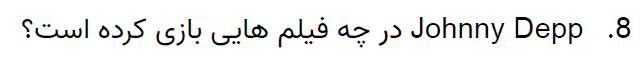

The above list contains movies starring Johnny Depp.

In [80]:
def extract_role_gender(actors, role):
    try:
        if len(actors) >= role:
            return actors[role - 1]['gender']  # Role is 1-based index, list is 0-based
    except:
        return None
    return None

for role in range(1, 6):
    df_credit[f'role_{role}_gender'] = df_credit['rt_actors'].apply(lambda x: extract_role_gender(x, role))

# Count male and female actors for each role
role_gender_counts = {}
for role in range(1, 6):
    gender_counts = df_credit[f'role_{role}_gender'].value_counts(normalize=True) * 100
    role_gender_counts[f'Role {role}'] = {'Male': gender_counts.get(2, 0), 'Female': gender_counts.get(1, 0)}

df_role_gender_percentages = pd.DataFrame(role_gender_counts).transpose()

print("Percentage of Male and Female Actors in the First to Fifth Roles:")
print(df_role_gender_percentages)

Percentage of Male and Female Actors in the First to Fifth Roles:
             Male     Female
Role 1  66.720322  25.674044
Role 2  52.888889  36.606061
Role 3  52.270884  34.590430
Role 4  52.625103  32.731747
Role 5  54.510961  28.583474


By this code we can answer the 7th question.

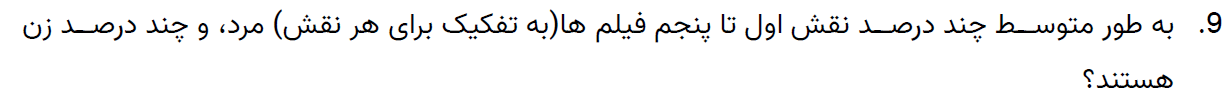


As we can see most of the actors are male.

In [81]:
df_movies['rt_release_date'] = pd.to_datetime(df_movies['rt_release_date'], format='%Y/%m/%d')

df_movies['release_year'] = df_movies['rt_release_date'].dt.year
last_10_years = df_movies[df_movies['release_year'] >= (2016 - 10)].copy()

def extract_genre_names(genre_data):
    if isinstance(genre_data, list): 
        return [genre['name'] for genre in genre_data if isinstance(genre, dict)]
    return []

last_10_years.loc[:, 'rt_genres'] = last_10_years['rt_genres'].apply(extract_genre_names)
last_10_years = last_10_years[last_10_years['rt_genres'].apply(lambda x: isinstance(x, list))]
df_exploded = last_10_years.explode('rt_genres')
genre_reviews = df_exploded.groupby('rt_genres')['rt_review_count'].sum().sort_values(ascending=False)
genre_scores = df_exploded.groupby('rt_genres')['rt_critics_score'].mean().sort_values(ascending=False).round(2)

print("Most Popular Genres (Based on Number of Reviews):")
print(genre_reviews.head(10))

print("\nHighest Rated Genres (Based on Average Critics Score):")
print(genre_scores.head(10))


Most Popular Genres (Based on Number of Reviews):
rt_genres
Action             838917
Adventure          725011
Drama              687553
Thriller           578257
Comedy             505399
Science Fiction    502029
Fantasy            336038
Crime              264444
Family             261666
Romance            205042
Name: rt_review_count, dtype: int64

Highest Rated Genres (Based on Average Critics Score):
rt_genres
Documentary    6.80
War            6.76
History        6.67
Foreign        6.57
Drama          6.52
Western        6.51
Romance        6.36
Animation      6.34
Mystery        6.32
Music          6.27
Name: rt_critics_score, dtype: float64


By this code we can answer the 10th question.

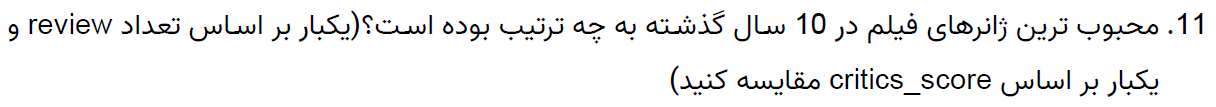

As we can see the most popular genre based on number of reviews is Action and based on critics score is Documentary.

# Revenue Prediction

In [82]:
df_movies.isnull().sum()

rt_production_budget         0
rt_genres                    0
rt_website                   0
rt_movie_id                  0
rt_keywords                  0
rt_original_language         0
rt_original_title            0
rt_synopsis                  0
rt_audience_score            0
rt_studios                   0
rt_production_countries      0
rt_release_date              0
rt_box_office                0
rt_runtime                   0
rt_languages                 0
rt_release_status            0
rt_tagline                   0
rt_title                     0
rt_critics_score             0
rt_review_count              0
genres                       0
countries                    0
production_countries_list    0
languages_list               0
release_year                 0
dtype: int64

In [83]:
df_credit.isnull().sum()

rt_movie_id         0
rt_title            0
rt_actors           0
rt_staff            0
actor_names         0
role_1_gender    2318
role_2_gender    2328
role_3_gender    2337
role_4_gender    2365
role_5_gender    2431
dtype: int64

In [84]:
numerical_columns = ['role_1_gender', 'role_2_gender', 'role_3_gender', 'role_4_gender', 'role_5_gender']
for col in numerical_columns:
    df_credit[col].fillna(df_credit[col].median(), inplace=True)

In [85]:
df_credit.isnull().sum()

rt_movie_id      0
rt_title         0
rt_actors        0
rt_staff         0
actor_names      0
role_1_gender    0
role_2_gender    0
role_3_gender    0
role_4_gender    0
role_5_gender    0
dtype: int64

## Feature Engineering

### Create New Features : **1. Number of Famous Actors**

In [86]:
# List of famous actors
famous_actors = ['Johnny Depp', 'Leonardo DiCaprio', 'Meryl Streep', 'Brad Pitt', 'Scarlett Johansson', 'Will Smith', 'Tom Hanks', 'Angelina Jolie']

# Function to count number of famous actors in the cast
def count_famous_actors(actors_list):
    if isinstance(actors_list, list):
        return sum(1 for actor in actors_list if actor['name'] in famous_actors)
    return 0

df_credit['num_famous_actors'] = df_credit['rt_actors'].apply(count_famous_actors)


### Create New Features : **2. Director's Popularity**

In [87]:
# List of famous directors
famous_directors = ['Steven Spielberg', 'Christopher Nolan', 'Quentin Tarantino', 'Martin Scorsese', 'James Cameron']

def is_famous_director(directors_list):
    if isinstance(directors_list, list):
        for director in directors_list:
            if director['name'] in famous_directors:
                return 1
    return 0
df_credit['is_famous_director'] = df_credit['rt_staff'].apply(is_famous_director)


### Create New Features : **3. Number of Genres**

In [88]:
def count_genres(genres_list):
    if isinstance(genres_list, list):
        return len(genres_list)
    return 0

df_movies['num_genres'] = df_movies['rt_genres'].apply(count_genres)

In [89]:
X_numeric = X.select_dtypes(include=['number'])  # Select only numeric columns
y_numeric = pd.to_numeric(y, errors='coerce')  # Convert 'y' to numeric (if necessary)

X_train, X_test, y_train, y_test = train_test_split(X_numeric, y_numeric, test_size=0.2, random_state=42)

# Modelling

## 1. Linear Regression

In [90]:
from sklearn.metrics import mean_squared_error, r2_score

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Evaluate performance
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Output results
print("Linear Regression - MSE:", mse_linear)
print("Linear Regression - R2:", r2_linear)

Linear Regression - MSE: 1.6798627295488442e+16
Linear Regression - R2: 0.6745484509116488


## 2. Random Forest Regressor

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Output results
print("Random Forest Regressor - MSE:", mse_rf)
print("Random Forest Regressor - R2:", r2_rf)

Random Forest Regressor - MSE: 1.4251111750597056e+16
Random Forest Regressor - R2: 0.723903250314468


## 3. Gradient Boosting Regressor

In [92]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluation
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Regressor - MSE:", mse_gb)
print("Gradient Boosting Regressor - R2:", r2_gb)

Gradient Boosting Regressor - MSE: 1.3714187216526852e+16
Gradient Boosting Regressor - R2: 0.734305464631326


In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rf_model = RandomForestRegressor()

# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 300),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10)
}

random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=3, verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

best_rf_model = random_search.best_estimator_

y_pred_rf = best_rf_model.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor - MSE:", mse_rf)
print("Random Forest Regressor - R2:", r2_rf)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
21 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", li

Random Forest Regressor - MSE: 1.5753240464433952e+16
Random Forest Regressor - R2: 0.6948014607307678


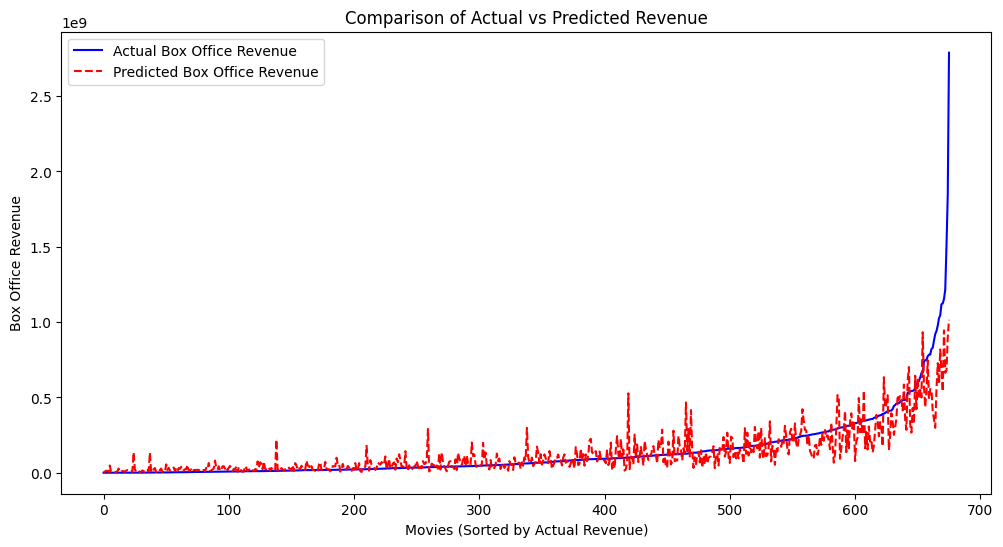

In [94]:
# Sort test set by actual revenue for better visualization
sorted_indices = y_test.argsort()
y_test_sorted = y_test.iloc[sorted_indices]
y_pred_rf_sorted = y_pred_rf[sorted_indices]

# Line plot
plt.figure(figsize=(12, 6))
plt.plot(y_test_sorted.values, label="Actual Box Office Revenue", color='blue')
plt.plot(y_pred_rf_sorted, label="Predicted Box Office Revenue", color='red', linestyle='dashed')

plt.xlabel("Movies (Sorted by Actual Revenue)")
plt.ylabel("Box Office Revenue")
plt.title("Comparison of Actual vs Predicted Revenue")
plt.legend()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_52336\2994867518.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")


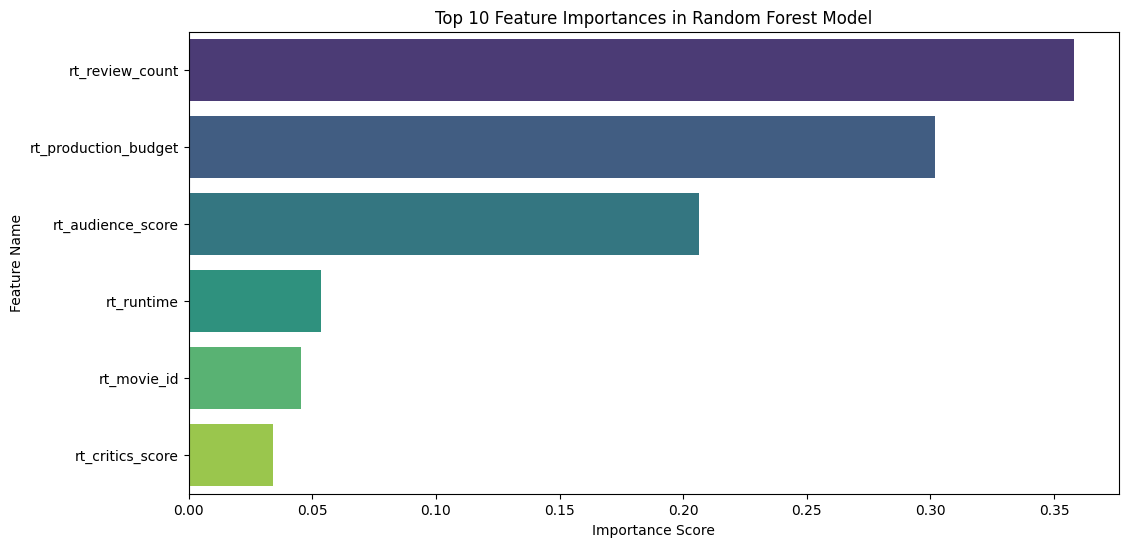

In [95]:
# Extract feature importances from Random Forest model
importances = best_rf_model.feature_importances_
features = X_train.columns

# Convert to DataFrame and sort by importance
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)  # Show top 10 features

# Plot Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette="viridis")
plt.title("Top 10 Feature Importances in Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()